In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import os
import math
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [80]:
for dirname, _, filenames in os.walk('/content/retail_price.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [81]:
warnings.filterwarnings('ignore')
pio.templates.default = 'plotly_white'
pd.set_option("display.max_columns", None)

In [82]:
data = pd.read_csv('/content/retail_price.csv')
display(data.head(20), data.describe(), data.shape)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-17,1,45.95,15.100000,45.950000,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-17,3,137.85,12.933333,45.950000,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-17,6,275.70,14.840000,45.950000,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-17,4,183.80,14.287500,45.950000,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-17,2,91.90,15.100000,45.950000,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,bed_bath_table,01-10-17,3,137.85,15.100000,45.950000,39,161,2,350,4.0,50,22,9,2,10,2017,8.333333,3800,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,bed_bath_table,01-11-17,11,445.85,15.832727,40.531818,39,161,2,350,4.0,97,22,8,4,11,2017,30.555556,3800,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,bed_bath_table,01-12-17,6,239.94,15.230000,39.990000,39,161,2,350,4.0,41,21,10,1,12,2017,16.666667,3800,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,bed_bath_table,01-01-18,19,759.81,16.533684,39.990000,39,123,2,350,4.0,62,23,8,2,1,2018,17.757009,3800,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,01-02-18,18,719.82,13.749444,39.990000,39,161,2,350,4.0,62,20,8,2,2,2018,16.822430,3800,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1424.005962,20.682270,106.496800,48.720414,767.343195,1.994083,1848.275148,4.085503,81.028107,21.773669,8.661243,1.494083,6.192308,2017.528107,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1708.890279,10.081817,76.182972,9.420715,655.258746,1.420473,2275.796254,0.232021,62.055560,0.986104,0.707028,0.940430,3.243455,0.502536,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,20.000000,8.000000,0.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,21.000000,8.000000,1.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,22.000000,9.000000,1.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,23.000000,9.000000,2.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,13000.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,23.000000,10.000000,4.000000,12.000000,2019.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


(676, 30)

In [83]:
data.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [84]:
# No duplicated rows. Ok
print("Duplicated: ", data.duplicated().sum())

# Missing values. Ok
print("Missing values: ", data.isna().sum().sum())

Duplicated:  0
Missing values:  0


In [85]:
fig = px.histogram(data, x='total_price', nbins=10, \
                    title='Distribution of Total Price')
fig.show()

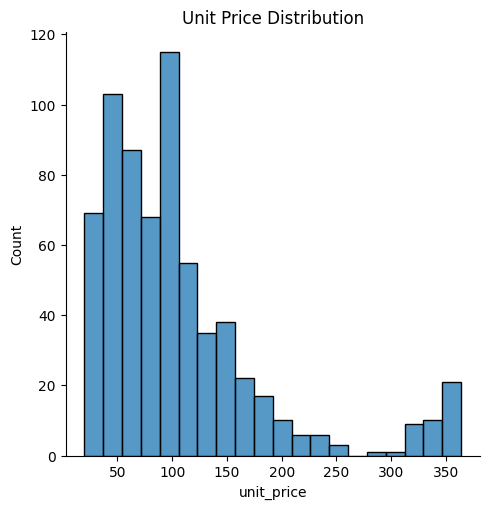

In [86]:
sns.displot(data['unit_price'])
plt.title("Unit Price Distribution")
plt.show()

In [87]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix.style.background_gradient(cmap='viridis')

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
qty,1.000000,0.748078,-0.135521,-0.103432,0.079973,-0.022772,0.128515,-0.034563,-0.004028,0.441547,0.030918,-0.077815,0.211610,-0.005129,0.057474,0.411001,0.049827,-0.033570,-0.047883,-0.053477,-0.027044,0.036633,-0.069855,-0.068522,-0.074466,-0.086439,-0.085885
total_price,0.748078,1.000000,0.025758,0.407850,-0.001773,0.173764,0.158756,0.062300,0.037044,0.384887,0.018130,-0.054227,0.135460,-0.029443,0.076637,0.334314,-0.087974,0.143755,0.056905,-0.007078,0.203727,0.113642,-0.000848,0.119686,-0.239175,-0.077537,0.425010
freight_price,-0.135521,0.025758,1.000000,0.203659,0.013398,0.423219,-0.200990,0.670414,0.199468,0.088261,-0.016132,0.028854,-0.081518,-0.028336,0.072804,-0.109359,0.122097,-0.013969,-0.053927,0.306479,-0.084208,0.168881,0.484647,-0.089285,0.054627,0.412115,0.201143
unit_price,-0.103432,0.407850,0.203659,1.000000,-0.170613,0.280228,0.076990,0.112880,0.042162,0.043391,-0.011949,0.001251,0.012573,-0.004249,-0.073469,-0.016552,-0.197233,0.317113,0.197425,-0.004518,0.466459,0.085436,0.026601,0.383780,-0.242111,0.019461,0.994453
product_name_lenght,0.079973,-0.001773,0.013398,-0.170613,1.000000,0.124589,0.131951,-0.043839,0.163520,0.082239,0.023797,-0.025139,-0.014317,-0.004250,-0.036046,-0.080830,0.329476,-0.344125,0.019053,-0.079388,-0.240613,-0.055069,0.016903,-0.382787,0.117217,-0.001470,-0.174862
product_description_lenght,-0.022772,0.173764,0.423219,0.280228,0.124589,1.000000,0.060119,0.386949,0.187560,0.067518,-0.019425,-0.011529,0.018294,-0.029421,0.025579,0.001313,-0.141504,-0.004384,0.188769,0.031761,0.015121,0.162815,0.155778,0.043956,0.048143,0.186767,0.273936
product_photos_qty,0.128515,0.158756,-0.200990,0.076990,0.131951,0.060119,1.000000,-0.129474,0.048286,-0.022536,0.022311,0.005377,-0.008898,0.041728,0.035515,0.083799,-0.153538,-0.045398,-0.005677,-0.194512,-0.133835,-0.042817,-0.158749,-0.000661,0.061731,-0.044935,0.075246
product_weight_g,-0.034563,0.062300,0.670414,0.112880,-0.043839,0.386949,-0.129474,1.000000,0.178917,0.053236,-0.030562,0.011472,-0.003080,-0.011402,-0.112273,-0.050796,0.252679,0.064448,-0.241643,0.138164,-0.016862,0.144517,0.320454,-0.035430,0.209181,0.351313,0.112708
product_score,-0.004028,0.037044,0.199468,0.042162,0.163520,0.187560,0.048286,0.178917,1.000000,0.020185,0.003121,-0.006501,-0.009899,-0.004952,-0.056217,-0.051636,0.117887,-0.215284,0.297746,-0.117613,-0.064352,0.506967,0.050800,-0.124399,0.353623,0.049791,0.035109
customers,0.441547,0.384887,0.088261,0.043391,0.082239,0.067518,-0.022536,0.053236,0.020185,1.000000,0.029810,-0.110164,0.310254,-0.022852,0.211495,0.214383,0.041641,-0.177735,0.077314,-0.204012,-0.142704,0.148290,-0.156454,-0.115673,-0.220235,-0.172532,0.056988


In [88]:
data2 = data.select_dtypes(['int', 'float'])

In [89]:
# Transform to log scale the target (y)
y = np.log(data2['total_price'])
X = data2.drop('total_price', axis=1)

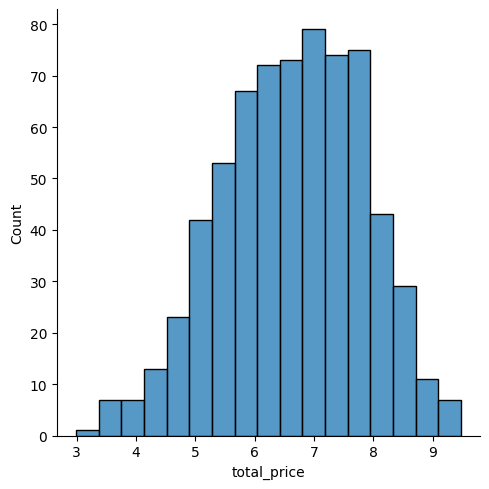

In [90]:
sns.displot(data=y)
plt.show()

In [91]:


def results_regression(y_test_ ,y_pred_):
    mse = mean_squared_error(y_test_ ,y_pred_)
    print(f"mse: {mse}")

    rmse = math.sqrt(mse)
    print(f"rmse: {rmse}")

    mae = mean_absolute_error(y_test_ ,y_pred_)
    print(f"mae: {mae}")

    mape = mean_absolute_percentage_error(y_test_ ,y_pred_)
    print(f"mape: {mape}")

    r2 = r2_score(y_test_ ,y_pred_)
    print(f"r2_score {r2}")

def compute_decision_tree_regression(X_, y_):
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

    # Train a linear regression model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results_regression(y_test, y_pred)
    return y_pred, y_test

y_pred, y_test = compute_decision_tree_regression(X, y)


mse: 0.06477260985870312
rmse: 0.25450463622241365
mae: 0.18056080843092895
mape: 0.029295441984880887
r2_score 0.9568502631016407


In [92]:
fig = go.Figure()
_title='Predicted vs. Actual Retail Price'

fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name=_title))

fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)],
                         y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))

fig.update_layout(
    title=_title,
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

In [93]:
!pip install eli5


In [94]:
!pip install shap


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import eli5
from eli5.sklearn import PermutationImportance
import shap

import os, sys

sys.path.insert(1, '../')

random_seed = 42

#os.environ['PYTHONHASHSEED'] = str(random_seed)
np.random.seed(random_seed)

In [96]:
fig = px.box(data,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

In [97]:
fig = px.scatter(data,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

In [98]:
fig = px.bar(data, x='product_category_name',
             y='total_price', title='Total Price by Product Category')
fig.show()

In [99]:
data['total_price_log'] = np.log(data['total_price'])
data['unit_price_log'] = np.log(data['unit_price'])
data['qty_log'] = np.log(data['qty'] + 1)

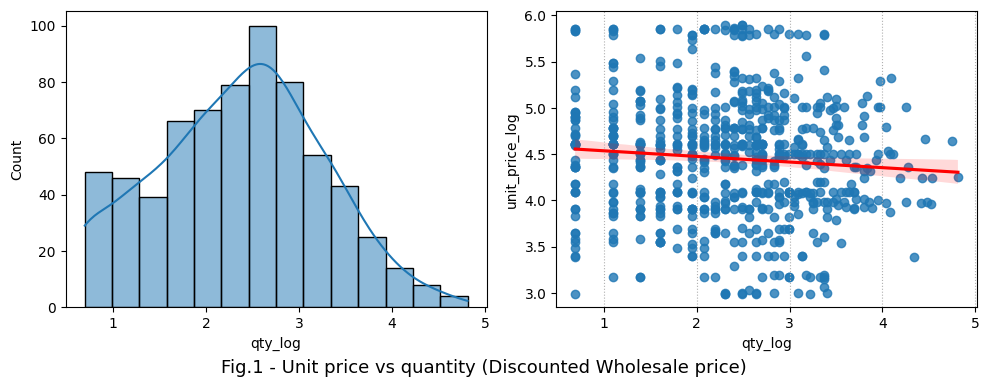

In [100]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

fig = sns.histplot(data['qty_log'], ax=ax[0], kde=True); #,bins=15
fig = sns.regplot(data, y='unit_price_log', ax=ax[1], x='qty_log', line_kws={"color": "red"}) #
ax[1].xaxis.grid(linestyle=':')


ax[0].set_title('Fig.1 - Unit price vs quantity (Discounted Wholesale price) ', y=-0.25, fontsize=13, x=1) #
plt.tight_layout()

In [101]:
fig = px.bar(data, x='product_category_name',
             y='unit_price', title='Unit Price by Product Category')
fig.show()

In [102]:
fig = px.box(data, x='weekday',
             y='total_price',
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

In [103]:
fig = px.box(data, x='weekend',
             y='total_price',
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

In [104]:
data['comp1_diff'] = data['unit_price'] - data['comp_1']
data['comp2_diff'] = data['unit_price'] - data['comp_2']
data['comp3_diff'] = data['unit_price'] - data['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=data['product_category_name'],
                 y=data[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

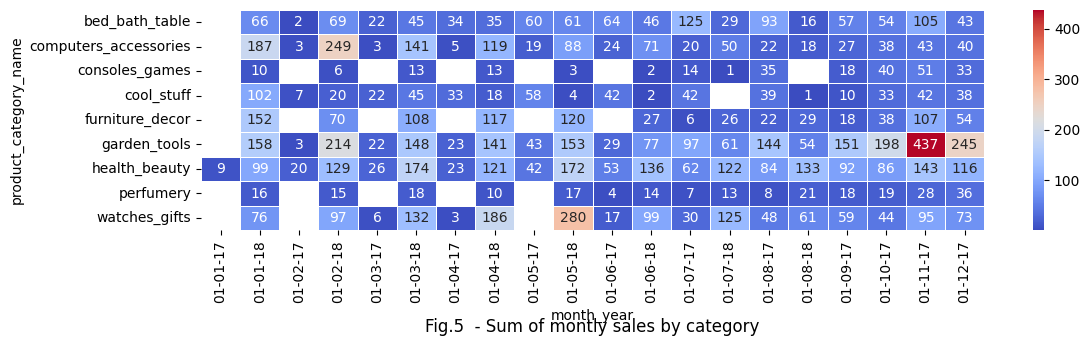

In [105]:
temp = data.pivot_table(
    values='qty',
    index='product_category_name',
    columns='month_year',
    aggfunc='sum')

means =  temp.loc[:,:'2017-12'].T.mean()
#temp = temp.values / means

fig,ax = plt.subplots(figsize=(12, 4))

fig = sns.heatmap(temp, annot=True, fmt='.0f',  linewidths=.5, cmap= 'coolwarm') #vmin=-1, vmax=1, fmt='.1g'center= 0,

ax.set_title(f'Fig.5  - Sum of montly sales by category', y=-0.5, fontsize=12);
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()


In [106]:
!pip install plotly

In [107]:
data['fp1_diff'] = data['freight_price'] - data['fp1']
data['fp2_diff'] = data['freight_price'] - data['fp2']
data['fp3_diff'] = data['freight_price'] - data['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=data['product_category_name'],
                 y=data[comp],
                 title=f"Competitor {i} Shipping Price Difference",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [108]:
corrs = data.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

In [109]:
monthly_data = data.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_data['month_year'] = pd.to_datetime(monthly_data['month_year'], format='%d-%m-%Y')
monthly_data = monthly_data.sort_values(by='month_year')

ValueError: time data '01-01-17' does not match format '%d-%m-%Y' (match)

In [ ]:
monthly_data.head()

In [ ]:
fig = px.scatter(monthly_data,
                 x='customers', y='total_price', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()


In [ ]:
fig = px.scatter(monthly_data,
             x='weekend', y='total_price', trendline='ols',
             title='Weekly Analysis of Total Price')
fig.show()

In [ ]:
fig = px.bar(monthly_data,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the CSV file
data = pd.read_csv('/content/retail_price.csv')  # Replace 'your_data.csv' with your file path

# Selecting columns for features and target
features = ['product_weight_g', 'product_score', 'product_photos_qty']
target = 'total_price'

# Separating features and target variable
X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Visualizing the 3D plot for three features and the price
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training data
ax.scatter(X_train['product_weight_g'], X_train['product_score'], y_train, c='blue', marker='o', label='Training Data')
# Scatter plot for testing data
ax.scatter(X_test['product_weight_g'], X_test['product_score'], y_test, c='red', marker='o', label='Test Data')

# Creating a meshgrid for prediction surface
x_surf = np.linspace(X['product_weight_g'].min(), X['product_weight_g'].max(), 100)
y_surf = np.linspace(X['product_score'].min(), X['product_score'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = model.predict(pd.DataFrame({'product_weight_g': x_surf.ravel(), 'product_score': y_surf.ravel(), 'product_photos_qty': [0] * len(x_surf.ravel())})).reshape(x_surf.shape)

# Plotting the prediction surface
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)

ax.set_xlabel('Product Weight')
ax.set_ylabel('Product Score')
ax.set_zlabel('Total Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Load the data from the CSV file
data = pd.read_csv('/content/retail_price.csv')  # Replace 'your_data.csv' with your file path

# Selecting columns for features and target
features = ['product_weight_g', 'product_score', 'product_photos_qty']
target = 'total_price'

# Separating features and target variable
X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Creating a DataFrame for visualization
visualization_data = X_test.copy()
visualization_data['predicted_price'] = predictions

# Creating an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(visualization_data, x='product_weight_g', y='product_score', z='product_photos_qty', color='predicted_price', opacity=0.7, size_max=10)
fig.update_layout(scene=dict(xaxis_title='Product Weight', yaxis_title='Product Score', zaxis_title='Product Photos Qty'))
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go

# Generating sample data for a curved surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Creating the surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Adding labels and adjusting layout
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Z-axis',
        aspectratio=dict(x=1, y=1, z=0.7),
        aspectmode='manual'
    ),
    title='Curved Surface Plot'
)

# Show the plot
fig.show()
